Analysis of cases in Switzerland

In [6]:
import pandas as pd
import os
import numpy as np
import sklearn.linear_model
import matplotlib.pyplot as plt
from sys import platform

In [7]:
if platform == "linux" or platform == "linux2":
    fp = '/home/jochem/Dropbox/Documenten/data/2020/'
elif platform == "win32":
    fp = r'F:/Jochem/Dropbox/Documenten/data/2020'

fn = 'CoronaVirus.xlsx'

In [16]:
df = pd.read_excel(os.path.join(fp,fn), sheet_name='Blad1')

In [19]:
df = df.dropna(subset = ['Total'])

In [20]:
df.head(n=14)

,Date,Day,Total,New
0,2020-02-25,1,1.0,1.0
1,2020-02-26,2,2.0,1.0
2,2020-02-27,3,8.0,6.0
3,2020-02-28,4,13.0,5.0
4,2020-02-29,5,18.0,5.0
5,2020-03-01,6,22.0,4.0
6,2020-03-02,7,40.0,18.0
7,2020-03-03,8,55.0,15.0
8,2020-03-04,9,72.0,17.0
9,2020-03-05,10,102.0,30.0


### Plot data

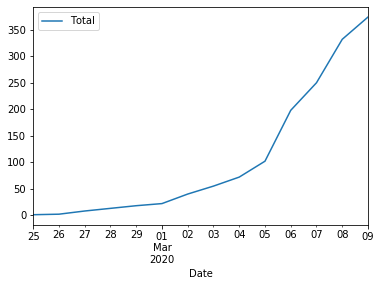

In [37]:
df.plot(x='Date',y='Total')
plt.show()

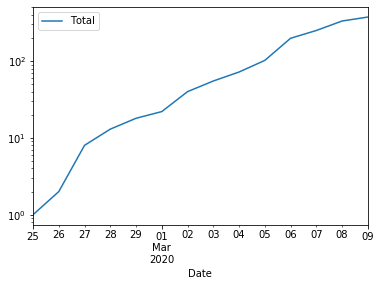

In [38]:
df.plot(x='Date',y='Total',logy=True)
plt.show()

### Linear Regression

In [39]:
x = np.c_[df['Day']-1]
y = np.c_[np.log(df['Total'])]

In [40]:
model = sklearn.linear_model.LinearRegression(fit_intercept=False)

In [41]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

### Plot prediction

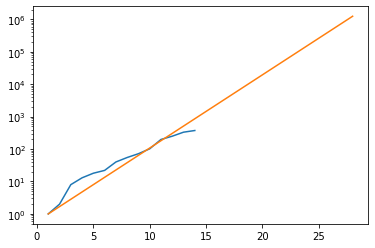

In [46]:
X_new = np.c_[np.arange(0,28)]
pred = model.predict(X_new)
y_new = [np.exp(val[0]) for val in pred]
Y_new = np.c_[y_new]

fig, ax = plt.subplots()
ax.plot(df['Day'],df['Total'])

ax.plot(X_new+1,Y_new)
plt.yscale('log')

In [47]:
day0 = df['Date'][0]

In [51]:
from datetime import timedelta

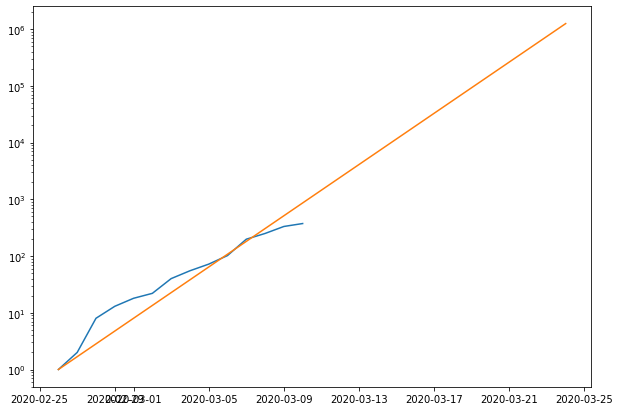

In [69]:
fig, ax = plt.subplots(figsize=(10,7))


daysx = [day0 + timedelta(days=int(days_[0]) +1) for days_ in X_new]
daysx_ = [day0 + timedelta(days=int(days_)) for days_ in df['Day']]
ax.plot(daysx_,df['Total'])
ax.plot(daysx,Y_new)
plt.yscale('log')